## A Random Forest binary classifier on the 470-feature data set with 150 trees.

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import preprocessing

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('CSV/feature_vectors_470.csv', index_col=False)

In [61]:
df.head(n=2)

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1


In [62]:
df.keys()

Index(['ACCESS_PERSONAL_INFO___', 'ALTER_PHONE_STATE___', 'ANTI_DEBUG_____',
       'CREATE_FOLDER_____', 'CREATE_PROCESS`_____', 'CREATE_THREAD_____',
       'DEVICE_ACCESS_____', 'EXECUTE_____', 'FS_ACCESS____',
       'FS_ACCESS()____',
       ...
       'utimes', 'vfork', 'vibrate', 'vibratePattern', 'wait4',
       'watchRotation', 'windowGainedFocus', 'write', 'writev', 'Class'],
      dtype='object', length=471)

In [63]:
len(df.index)

11598

In [64]:
features = df.iloc[0:11598,0:469].values
y = df['Class'].values

In [65]:
features_train, features_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=42)

In [66]:
scaler = preprocessing.StandardScaler().fit(features_train)

In [67]:
features_train = scaler.transform(features_train)

In [68]:
y_train_5 = (y_train!=5)
y_test_5 = (y_test!=5)

In [69]:
dt_clf = RandomForestClassifier(n_estimators=150)
dt_clf.fit(features_train, y_train_5)

RandomForestClassifier(n_estimators=150)

In [70]:
cross_val_score(dt_clf, features_train, y_train_5, cv=5, scoring="accuracy", verbose=True)

array([0.97252155, 0.97467672, 0.97898707, 0.98059299, 0.97358491])

In [71]:
y_train_pred = cross_val_predict(dt_clf, features_train, y_train_5, cv=5)

In [72]:
confusion_matrix(y_train_5, y_train_pred)

array([[1265,  182],
       [  42, 7789]])

In [73]:
precision_score(y_train_5, y_train_pred)

0.9771672312131476

In [74]:
recall_score(y_train_5, y_train_pred)

0.9946367002937045

In [75]:
f1_score(y_train_5, y_train_pred)

0.985824579167194

In [76]:
tn,fp,fn,tp = confusion_matrix(y_train_5,y_train_pred).ravel()

In [77]:
tn,fp,fn,tp

(1265, 182, 42, 7789)

In [78]:
test_scaler = preprocessing.StandardScaler().fit(features_test)

In [79]:
features_test = scaler.transform(features_test)

In [80]:
y_test_pred = cross_val_predict(dt_clf, features_test, y_test_5, cv=3)

In [81]:
confusion_matrix(y_test_5, y_test_pred)

array([[ 269,   79],
       [   6, 1966]])

In [82]:
precision_score(y_test_5, y_test_pred)

0.9613691931540342

In [83]:
recall_score(y_test_5, y_test_pred)

0.9969574036511156

In [84]:
f1_score(y_test_5, y_test_pred)

0.978839930296241

In [85]:
tn,fp,fn,tp = confusion_matrix(y_test_5, y_test_pred).ravel()

In [86]:
tn,fp,fn,tp

(269, 79, 6, 1966)

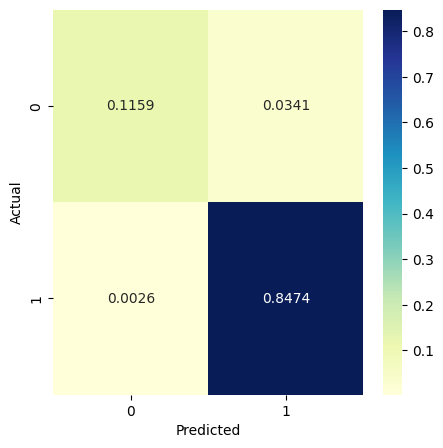

In [87]:
cm = confusion_matrix(y_test_5, y_test_pred, normalize='all')
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.4f', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

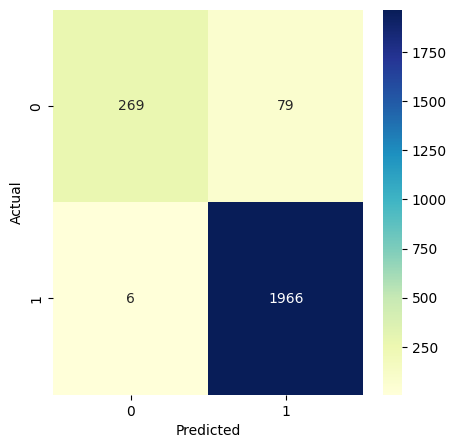

In [88]:
cm = confusion_matrix(y_test_5, y_test_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)